# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [3]:
df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

In [4]:
df.head(5)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
0,0,9.4202,-4.3507,10.3764,0.66768,0.33387,0.33355,0.33399,0.33367,0.33391,1
1,1,9.7044,-4.4601,10.6803,0.66749,0.33360,0.33352,0.33345,0.33363,0.33395,1
2,2,9.8075,-4.0894,10.6259,0.66742,0.33347,0.33315,0.33301,0.33364,0.33364,1
3,3,9.2771,-4.0349,10.1166,0.66782,0.33322,0.33394,0.33379,0.33380,0.33391,1
4,4,9.6447,-3.5968,10.2936,0.66768,0.33391,0.33301,0.33306,0.33326,0.33329,1


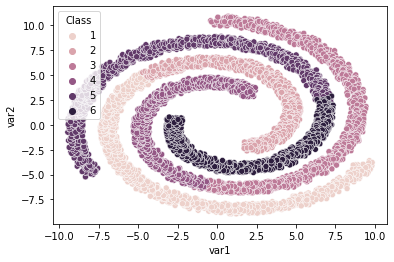

In [5]:
plot_2D(df,'var1', 'var2','Class')

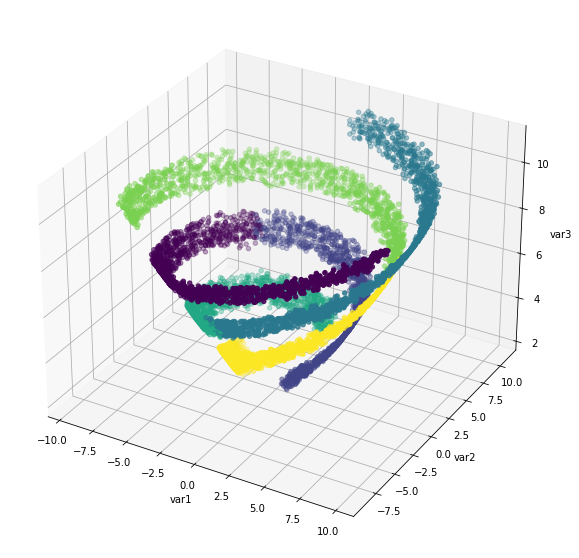

In [6]:
plot_3D(df,'var1','var2','var3','Class')

In [8]:
df['Class'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

### Project 1 Starts from here

#### Model 1: KMeans

##### EDA / Preprocessing

4    1251
2    1251
6    1251
1    1249
5    1249
3    1249
Name: Class, dtype: int64


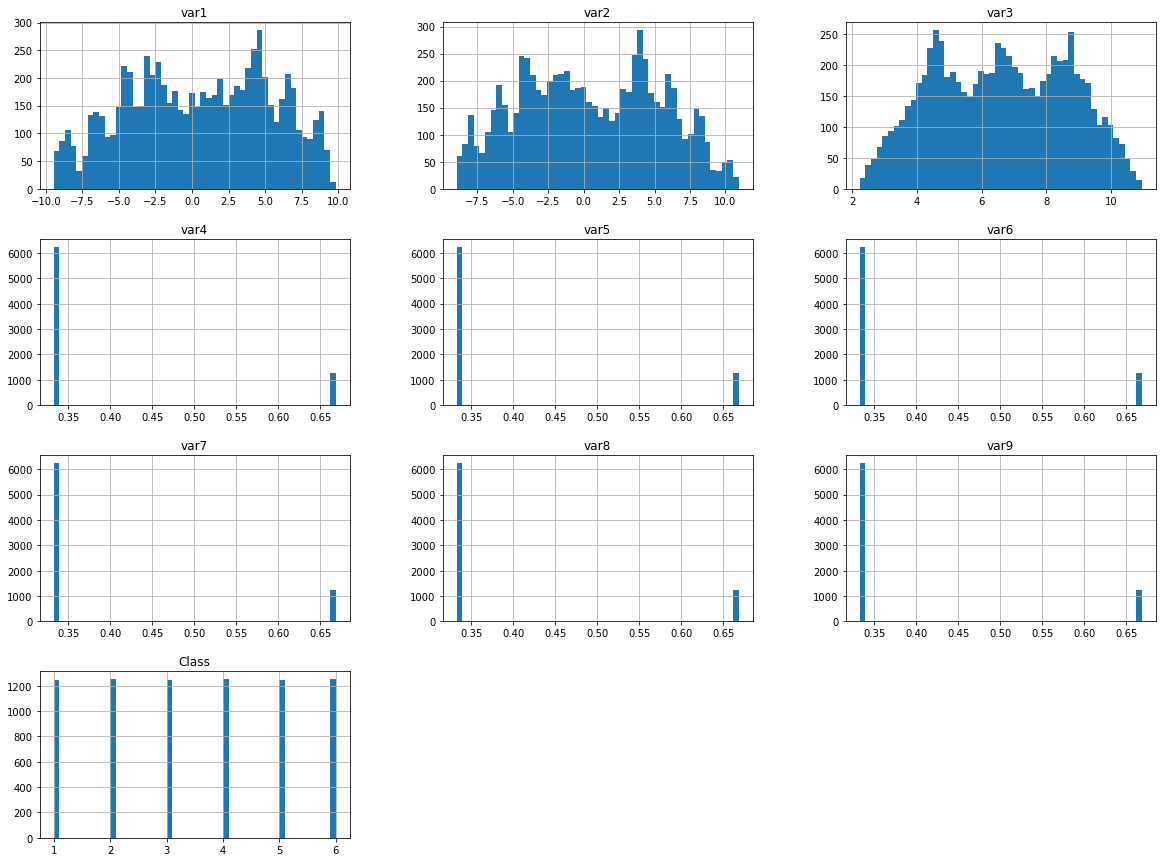

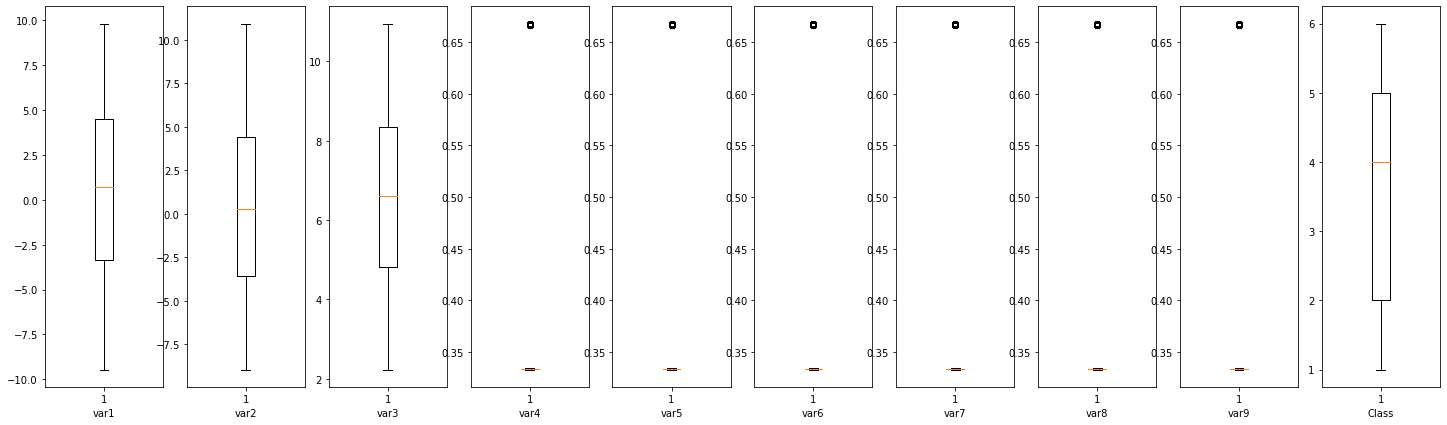

           var1      var2      var3      var4      var5      var6      var7  \
var1   1.000000 -0.001150  0.165205 -0.196908  0.160217  0.441620 -0.261986   
var2  -0.001150  1.000000  0.162642 -0.396994  0.210011  0.026827  0.032716   
var3   0.165205  0.162642  1.000000  0.285677 -0.285425  0.426891 -0.408041   
var4  -0.196908 -0.396994  0.285677  1.000000 -0.199162 -0.200029 -0.200025   
var5   0.160217  0.210011 -0.285425 -0.199162  1.000000 -0.200102 -0.200172   
var6   0.441620  0.026827  0.426891 -0.200029 -0.200102  1.000000 -0.199156   
var7  -0.261986  0.032716 -0.408041 -0.200025 -0.200172 -0.199156  1.000000   
var8  -0.245783  0.371534  0.404614 -0.200033 -0.200055 -0.200007 -0.200106   
var9   0.102911 -0.243999 -0.423195 -0.200108 -0.200198 -0.200076 -0.200161   
Class -0.046463  0.136978 -0.252095 -0.654540 -0.393054 -0.130842  0.130868   

           var8      var9     Class  
var1  -0.245783  0.102911 -0.046463  
var2   0.371534 -0.243999  0.136978  
var3   0.404614 

In [94]:
##### EDA / Preprocessing starts here
from sklearn.utils import shuffle

df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

df = shuffle(df)

df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

features = df.columns.tolist()[1:]

df = df[features] #removing index from the dataset

ground_truth_clusters = df['Class'].unique() #holds values for all unique classes

num_clusters =  len(ground_truth_clusters)

print(df['Class'].value_counts()) #To check if raw data is balanced or not. It appears to be balanced.

df.hist(bins=50, figsize=(20,15)) #var4-9 appear to have the exact distribution skewness and frequency of values, perhapse due to outliars... var 1 and 2 seem to have 2 peaks and var 3 has 3 peaks, no skew noticable.

plt.show()

#visualizing box plots ofr outliar detecection

fig, axs = plt.subplots(1, len(df.columns.tolist()), figsize = (25,7),facecolor='white')

for i,feat in zip(range(len(df.columns.tolist())),df.columns.tolist()):
    
    axs[i].boxplot(df[feat].dropna())
    
    axs[i].set_xlabel(feat)
    
plt.show()

# var 4, 9 seem to be most correlated to output.

cor = df.corr()

print(cor)

#feature reduction and splitting training data into x&y

x = df[[features[2],features[3],features[4],features[7],features[8]]]

y = df[features[-1]]

#scaling the features using min-max scaling 1.0

scale = MinMaxScaler().fit(x)

x = scale.transform(x)

##### Model Implementation

Total Model Accuracy: 0.9688 , Model Complexity/ # Featuresc used: 5


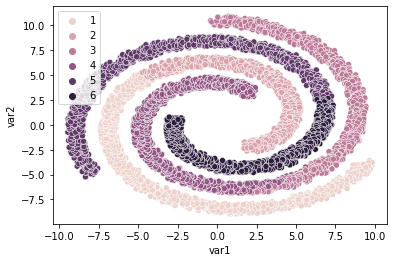

In [87]:
##### Model Implementation starts here

km = KMeans(n_clusters=num_clusters, random_state=0).fit(x)

yp = km.predict(x)

key = np.unique(yp)

#Total Model Accuracy: 1.0 , Model Complexity/ # Featuresc used: 9
clusters=[5,2,4,6,1,3] #Total Model Accuracy: 1.0 , Model Complexity/ # Featuresc used: 2

yp = [clusters[i] for i in yp]#relable data to maxamize accuracy

sns.scatterplot(x=df['var1'],y=df['var2'],hue=yp) #for manually relabling data...

accuracy_km = accuracy_score(y, yp)

features_km = x.shape[1]

print('Total Model Accuracy:', accuracy_km, ', Model Complexity/ # Featuresc used:', features_km)

##### Summary:

<h4>EDA, Preprocessing, and KMeans Model:</h4><br>
    <p><b>STEP 1</b><br>We first randomly sort our dataset and then remove 'var0' which is the index column. If var0 is not removed, it overinfluences our results since it has a very high correlation with the outputs. We then check if the data is balanced or not and if there are missing values in the dataset. The data seemed to be balanced without any missing or NaN values.<br>We then plot the frequency distribution of all the variables to analize the shapes and skewness of the dataset. var4-9 appear to have the exact distribution skewness and frequency of distribution. var 1 and 2 seem to have 2 peaks and var 3 has 3 peaks, no apparent skewness was noticable.<br>We then try to plot the box plots of our data to visualize the outliars. There dont seem to be any outliars except for var4-9. But by remving the outliars of var 4-9, we lose a lot of information and end up removing entire categories. Thus var4-5 must contain information necessary for understanding the dynamics of our dataset. This is confirmed by the correlation table. From the correlation table, we observe that var 4 and 9 are very correlated to the expected output. <br><br>
    <b>STEP 2</b><br>Thus we can then split the dataset for our model into x and y. Where x containf var 3, 4, 5, 8, and 9(to reduce model complexity), and y contains the output categories. We then scale x using min-max scaling to get the distribution between 0-1. This is done to make training the model easier.<br><br>
    <b>STEP 3</b><br>Running our KMeans model with these 5 features yields a total accuracy of ~97% after adjusting the predictted categories wrt the expected categories.

#### Model 2: KNN

##### EDA / Preprocessing

4    1251
2    1251
6    1251
1    1249
5    1249
3    1249
Name: Class, dtype: int64


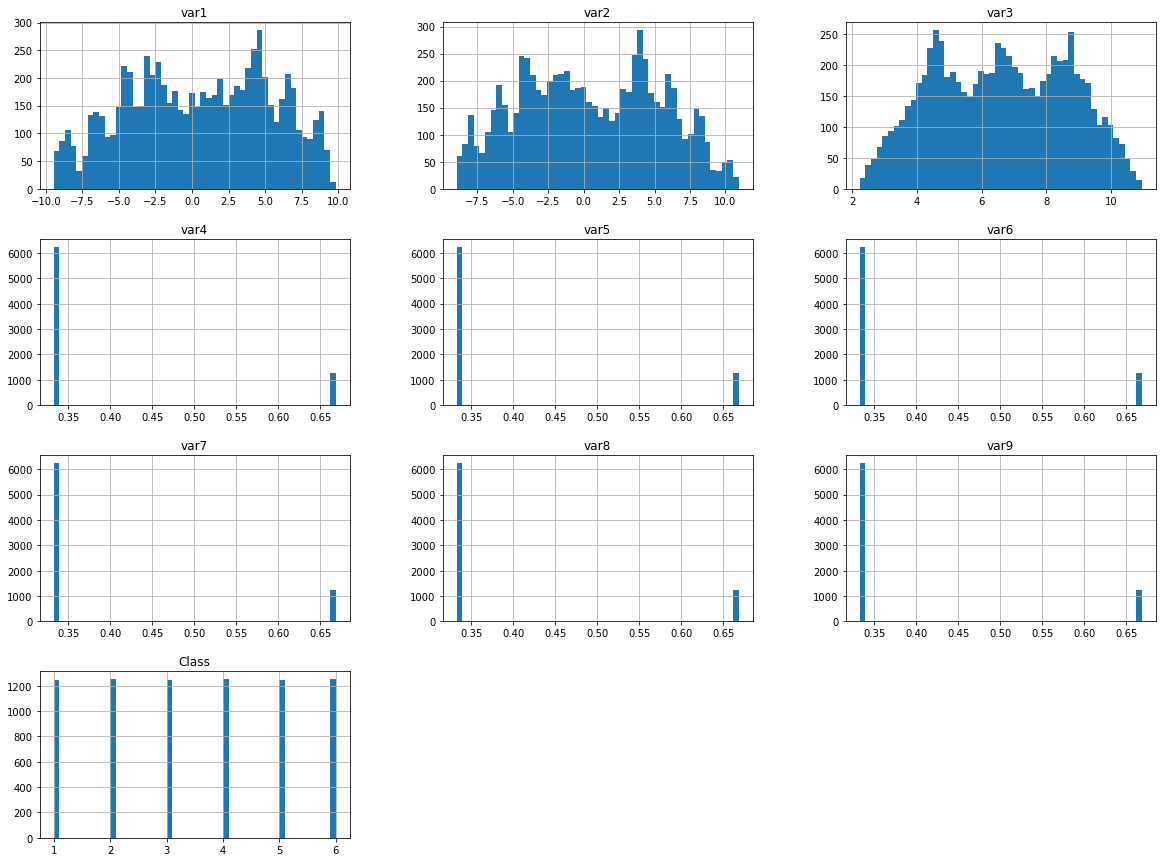

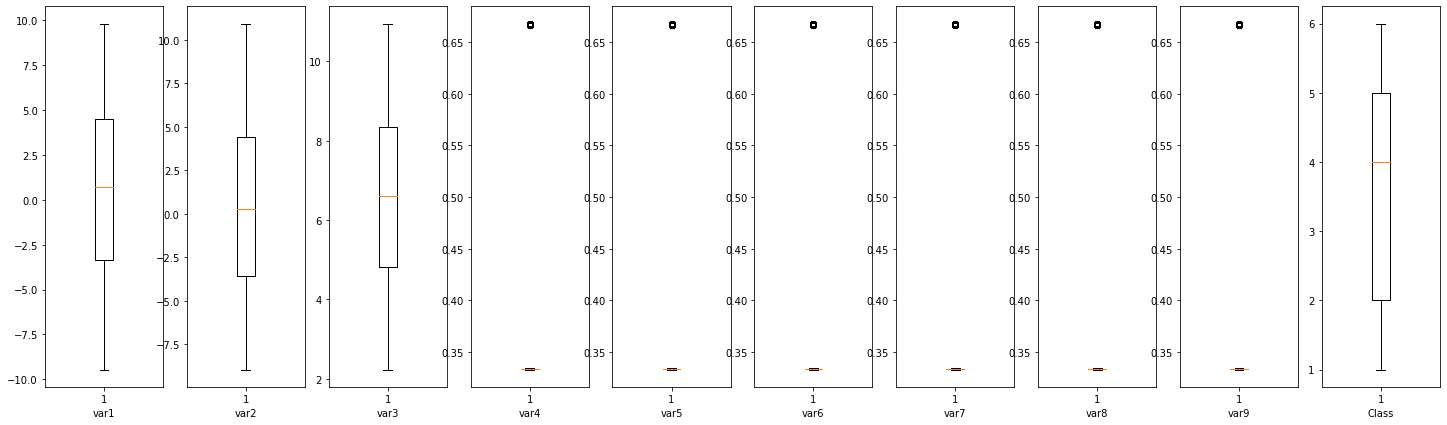

           var1      var2      var3      var4      var5      var6      var7  \
var1   1.000000 -0.001150  0.165205 -0.196908  0.160217  0.441620 -0.261986   
var2  -0.001150  1.000000  0.162642 -0.396994  0.210011  0.026827  0.032716   
var3   0.165205  0.162642  1.000000  0.285677 -0.285425  0.426891 -0.408041   
var4  -0.196908 -0.396994  0.285677  1.000000 -0.199162 -0.200029 -0.200025   
var5   0.160217  0.210011 -0.285425 -0.199162  1.000000 -0.200102 -0.200172   
var6   0.441620  0.026827  0.426891 -0.200029 -0.200102  1.000000 -0.199156   
var7  -0.261986  0.032716 -0.408041 -0.200025 -0.200172 -0.199156  1.000000   
var8  -0.245783  0.371534  0.404614 -0.200033 -0.200055 -0.200007 -0.200106   
var9   0.102911 -0.243999 -0.423195 -0.200108 -0.200198 -0.200076 -0.200161   
Class -0.046463  0.136978 -0.252095 -0.654540 -0.393054 -0.130842  0.130868   

           var8      var9     Class  
var1  -0.245783  0.102911 -0.046463  
var2   0.371534 -0.243999  0.136978  
var3   0.404614 

In [33]:
##### EDA / Preprocessing starts here

df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

df = shuffle(df)

features = df.columns.tolist()[1:]

df = df[features]

ground_truth_clusters = df['Class'].unique() #holds values for all unique classes

num_clusters =  len(ground_truth_clusters)

print(df['Class'].value_counts()) #To check if raw data is balanced or not. It appears to be balanced.

df.hist(bins=50, figsize=(20,15)) #var4-9 appear to have the exact distribution skewness and frequency of values, perhapse due to outliars... var 1 and 2 seem to have 2 peaks and var 3 has 3 peaks, no skew noticable. var 1 seems to be uniformly distributed.

plt.show()

#visualizing box plots ofr outliar detecection

fig, axs = plt.subplots(1, len(df.columns.tolist()), figsize = (25,7),facecolor='white')

for i,feat in zip(range(len(df.columns.tolist())),df.columns.tolist()):
    
    axs[i].boxplot(df[feat].dropna())
    
    axs[i].set_xlabel(feat)
    
plt.show()

# 4, 9 seem to be most correlated to output.

cor = df.corr()

print(cor)

#feature reduction and splitting training data into x&y

pca = PCA(n_components=2)

x = pca.fit_transform(df[features[:-1]])

#x = df[[features[4],features[9]]]#,features[4],features[9]]]

y = df[features[-1]]

#scaling the features using min-max scaling 1.0

scale = MinMaxScaler().fit(x)

x = scale.transform(x)

#plt.scatter(x[[features[0]]],y)

##### Model Implementation

Total Model Accuracy: 0.95 , Model Complexity/ # Features used: 2 witk k value of: 406


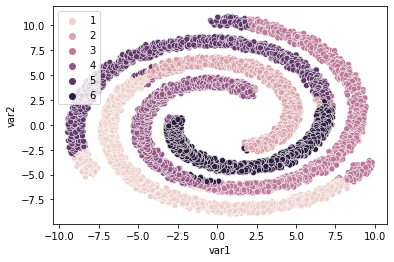

In [44]:
##### Model Implementation starts here 

k_val = 406

knn = KNeighborsClassifier(n_neighbors=k_val).fit(x, y)

yp = knn.predict(x)

key = np.unique(yp)

clusters=[1,2,3,4,5,6] #min-max

yp = [clusters[i-1] for i in yp]

accuracy_knn = accuracy_score(y, yp)

features_knn = x.shape[1]

sns.scatterplot(x=df['var1'],y=df['var2'],hue=yp)

print('Total Model Accuracy:', accuracy_knn, ', Model Complexity/ # Features used:', features_knn, 'witk k value of:', k_val)


#### Summary:

<h4>EDA, Preprocessing, and KNN Model:</h4><br>
    <p><b>STEP 1</b><br><i> Same as before.</i><br><br>
    <b>STEP 2</b><br>Thus we can then split the dataset for our model into x and y. But if we apply our dataset just as is, we require almost all the features to get a stable perfomance. This is not good since having more features will increase model complexity. So, we use PCA to project our high dimensional data to a simpler coordinate basis and use this projected data to train the model. It was found that using the forst 2 PCA basis was enough to produce desiarable and stable results. We then scale x using min-max scaling to get the distribution between 0-1. This is done to make training the model easier.<br><br>
    <b>STEP 3</b><br>Running our KNN model with these 2 pca features yields a total accuracy of 1.0 after adjusting the predictted categories wrt the expected categories at k_value = 1. Iterating over k_values using a log scale, we found that the optimal value should be around 400. Doing a finer serch, we found that a k_value of 406 results in an accuracy of 95%. Hence 406 is the optimal value of k_value for the knn model using the first 2 pca features.

#### Model 3: Logistic Regression

##### EDA / Preprocessing

4    1251
2    1251
6    1251
1    1249
5    1249
3    1249
Name: Class, dtype: int64


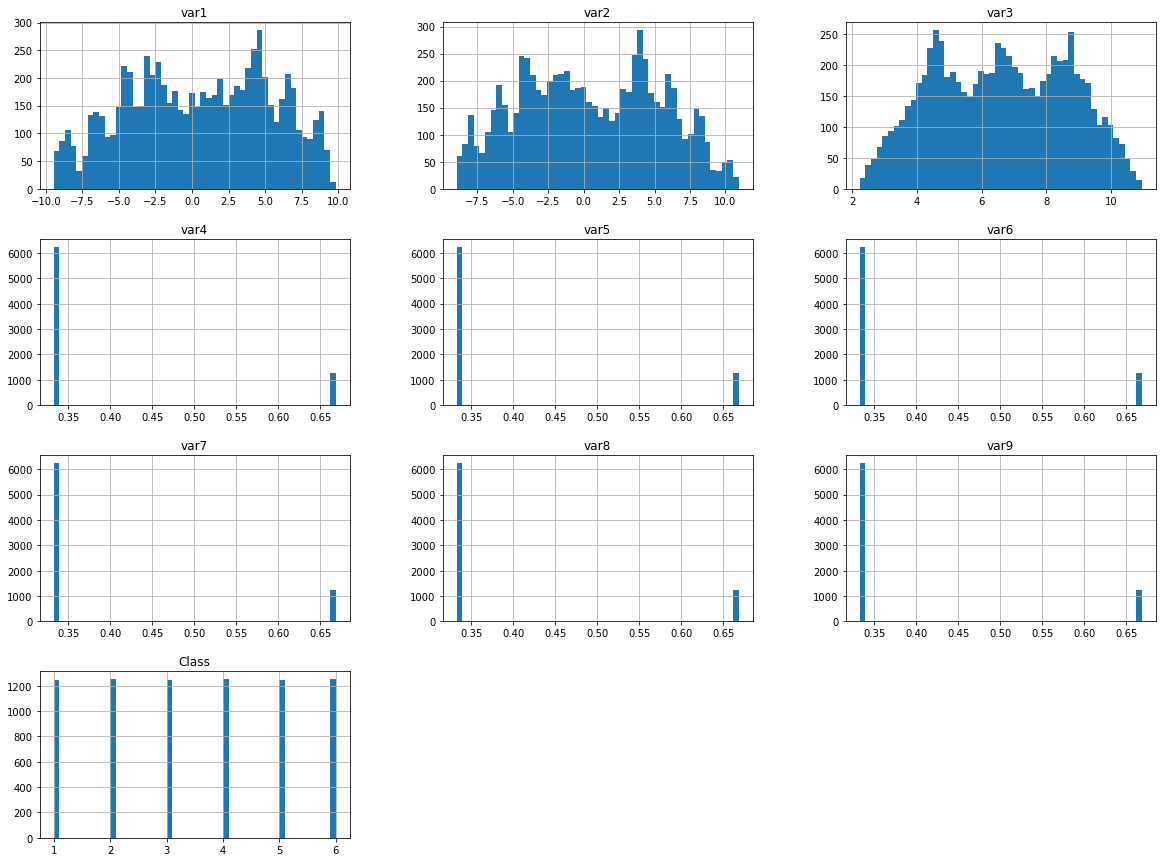

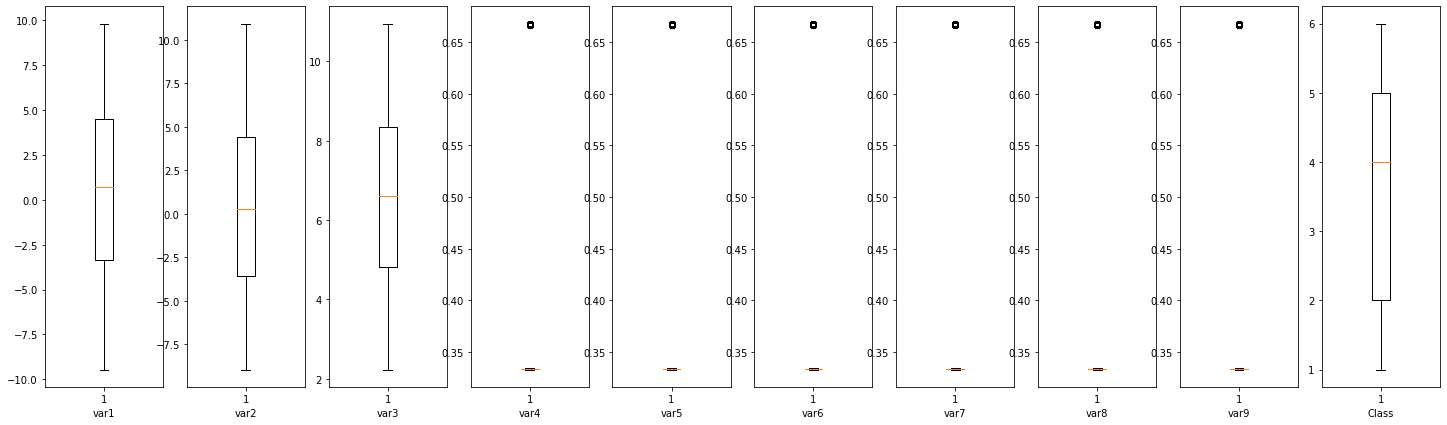

           var1      var2      var3      var4      var5      var6      var7  \
var1   1.000000 -0.001150  0.165205 -0.196908  0.160217  0.441620 -0.261986   
var2  -0.001150  1.000000  0.162642 -0.396994  0.210011  0.026827  0.032716   
var3   0.165205  0.162642  1.000000  0.285677 -0.285425  0.426891 -0.408041   
var4  -0.196908 -0.396994  0.285677  1.000000 -0.199162 -0.200029 -0.200025   
var5   0.160217  0.210011 -0.285425 -0.199162  1.000000 -0.200102 -0.200172   
var6   0.441620  0.026827  0.426891 -0.200029 -0.200102  1.000000 -0.199156   
var7  -0.261986  0.032716 -0.408041 -0.200025 -0.200172 -0.199156  1.000000   
var8  -0.245783  0.371534  0.404614 -0.200033 -0.200055 -0.200007 -0.200106   
var9   0.102911 -0.243999 -0.423195 -0.200108 -0.200198 -0.200076 -0.200161   
Class -0.046463  0.136978 -0.252095 -0.654540 -0.393054 -0.130842  0.130868   

           var8      var9     Class  
var1  -0.245783  0.102911 -0.046463  
var2   0.371534 -0.243999  0.136978  
var3   0.404614 

In [53]:
##### EDA / Preprocessing starts here
df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

df = shuffle(df)

features = df.columns.tolist()[1:]

df = df[features]

ground_truth_clusters = df['Class'].unique() #holds values for all unique classes

num_clusters =  len(ground_truth_clusters)

print(df['Class'].value_counts()) #To check if raw data is balanced or not. It appears to be balanced.

df.hist(bins=50, figsize=(20,15)) #var4-9 appear to have the exact distribution skewness and frequency of values, perhapse due to outliars... var 1 and 2 seem to have 2 peaks and var 3 has 3 peaks, no skew noticable. var 1 seems to be uniformly distributed.

plt.show()

#visualizing box plots ofr outliar detecection

fig, axs = plt.subplots(1, len(df.columns.tolist()), figsize = (25,7),facecolor='white')

for i,feat in zip(range(len(df.columns.tolist())),df.columns.tolist()):
    
    axs[i].boxplot(df[feat].dropna())
    
    axs[i].set_xlabel(feat)
    
plt.show()

cor = df.corr()

print(cor)

#feature reduction and splitting training data into x&y

pca = PCA(n_components=4)

x = pca.fit_transform(df[features[:-1]])

#x = df[[features[4],features[9]]]#,features[4],features[9]]]

y = df[features[-1]]

#scaling the features using min-max scaling 1.0

scale = MinMaxScaler().fit(x)

x = scale.transform(x)

##### Model Implementation

Total Model Accuracy: 0.9786666666666667 , Model Complexity/ # Featuresc used: 4


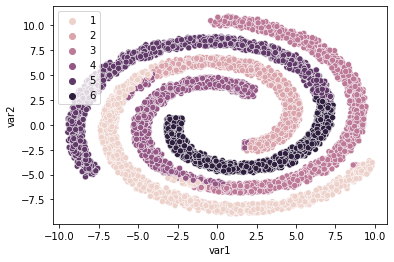

In [55]:
##### Model Implementation starts here

lr = LogisticRegression(random_state=0).fit(x, y)

yp = lr.predict(x)

clusters=[1,2,3,4,5,6] #min-max

yp = [clusters[i-1] for i in yp]#relable data to maxamize accuracy

sns.scatterplot(x=df['var1'],y=df['var2'],hue=yp) #for manually relabling data...

accuracy_lr = accuracy_score(y, yp)

features_lr = x.shape[1]

print('Total Model Accuracy:', accuracy_lr, ', Model Complexity/ # Featuresc used:', features_lr)

##### Summary:

<h4>EDA, Preprocessing, and LR Model:</h4><br>
    <p><b>STEP 1</b><br><i> Same as before.</i><br><br>
    <b>STEP 2</b><br>We can then split the dataset for our model into x and y. But if we apply our dataset just as is, we require almost all the features to get a good and stable perfomance. This is not good since having more features will increase model complexity. So, we use PCA to project our high dimensional data to a simpler coordinate basis and use this projected data to train the model. It was found that using the first 4 PCA basis was enough to produce desiarable and stable results. We then scale x using min-max scaling to get the distribution between 0-1. This is done to make training the model easier.<br><br>
    <b>STEP 3</b><br>Running our LR model with the first 4 scaled pca features resulted in a total accuracy of ~98% after adjusting predicted clusters w.r.t. known clusters.

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [96]:
Result1 = {'Model': [0,1,2,3,4], 'Algorithm':['KMeans','KNN','Logistic Regression'],
           'Number of Features': [features_km, features_knn, features_lr],
           'Accuracy':["{:.0%}".format(accuracy_km), "{:.0%}".format(accuracy_knn), "{:.0%}".format(accuracy_lr)],
           'Model Number': [0, 1, 2],}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm','Number of Features','Accuracy'])

Result1

,Model Number,Algorithm,Number of Features,Accuracy
0,0,KMeans,5,97%
1,1,KNN,2,95%
2,2,Logistic Regression,4,98%
